In [9]:
import os
import sys
from pathlib import Path

import matplotlib.pyplot as plt
from GreenSlothUtils.demonstration import (
    create_day_simulation_fig,
    create_fvcb_fig,
    create_mca_fig,
    create_pam_fig,
    create_pamfit,
)

sys.path.append(os.path.abspath('..'))

from model import Li2021

    
def save_fig(fig_name: str) -> Path:
    here = Path("").absolute()
    name = "Li2021"
    plt.savefig(here / f"{name.lower()}_demon_{fig_name}.svg", format="svg", bbox_inches="tight")
    

# Str Dictionary

In [10]:
pfd_str = "PPFD"
vc_str = None
atp_str = None
nadph_str = "NADPH_st"
fluorescence_str = None
co2_str = None
pco2_str = None
H_cp_co2_str = None
gammastar_str = None
r_light_str = None
A_str = None
tend_quasi= None
npq_str = "NPQ"
coeff_psii_str = "k_recomb"
coeff_psi_str = "sigma0_I"
coeff_rubisco_str = None
coeff_cytb6f_str = "c_b6f"
coeff_atp_synthase_str = None
rubp_str = None
pq_str = "PQ"
pc_str = "PC_ox"
v_psii_str = "vPSII_recomb"
v_psi_str = "vPSII_ChSep"
v_cytb6f_str = "v_b6f"
v_atp_synthase_str = None

# Day Simulation

Trying simulation with 100 time points per step.


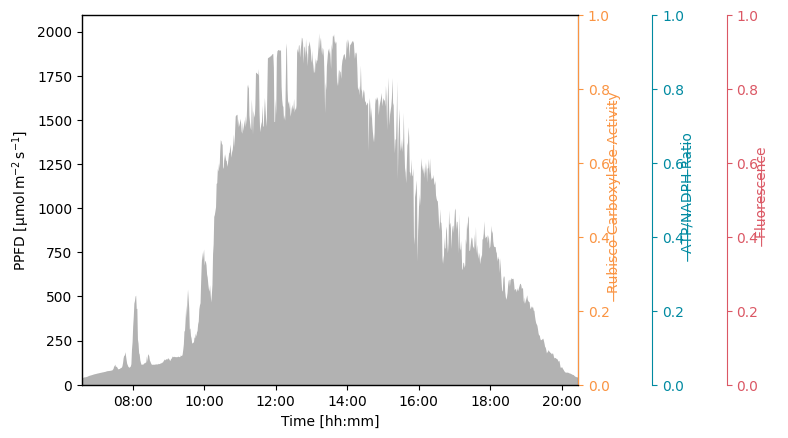

In [11]:
create_day_simulation_fig(
    model=Li2021(),
    pfd=pfd_str,
    vc=vc_str,
    atp=atp_str,
    nadph=nadph_str,
    fluorescence=fluorescence_str,
)

save_fig("daysimulation")

# FvCB Comparision

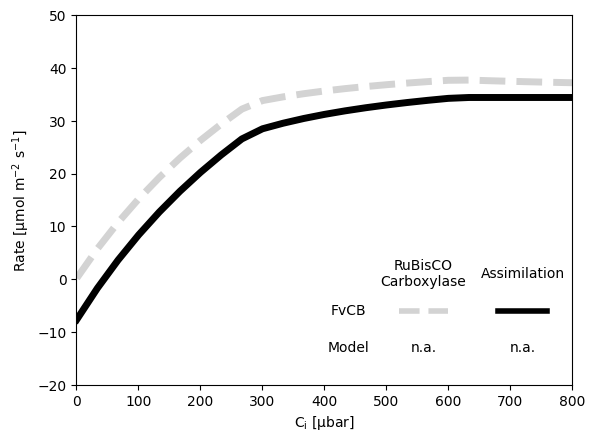

In [12]:
m = Li2021()

create_fvcb_fig(
    model=m,
    pfd=pfd_str,
    co2=co2_str,
    vc=vc_str,
    pco2=pco2_str,
    H_cp_co2=H_cp_co2_str,
    gammastar=gammastar_str,
    r_light=r_light_str,
    A=A_str,
    tend_quasi=tend_quasi
)

save_fig("fvcb")

# PAM Sample

Trying pam-simulation with 100 time points per step.


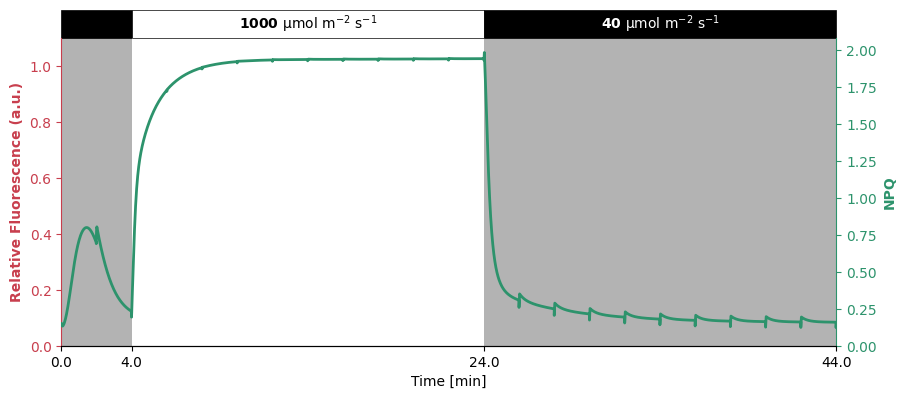

In [13]:
create_pam_fig(
    model=Li2021(),
    pfd_str=pfd_str,
    fluorescence_str=fluorescence_str,
    npq_str=npq_str,
)

save_fig("pam")

# Photosynthesis MCA

/home/elouencorvestnew/Documents/GreenSlothUtils/src/GreenSlothUtils/demonstration/photosynthesis_mca.py:157: RuntimeWarning: All-NaN slice encountered
  max_coeff = np.nanmax(np.abs(plot_vars.values))
/home/elouencorvestnew/Documents/GreenSlothUtils/src/GreenSlothUtils/demonstration/photosynthesis_mca.py:170: RuntimeWarning: All-NaN slice encountered
  max_coeff = np.nanmax(np.abs(plot_fluxes.values))


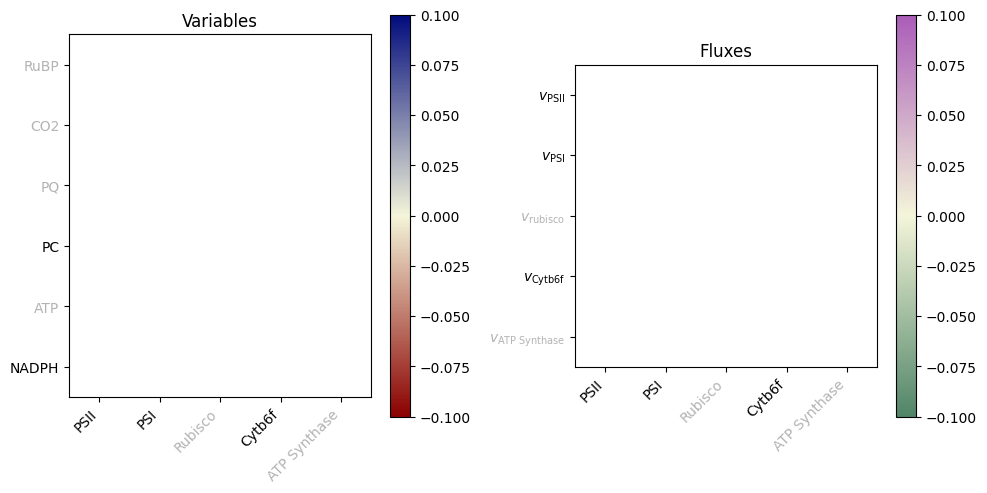

In [14]:
create_mca_fig(
    model=Li2021(),
    coeff_psii=coeff_psii_str,
    coeff_psi=coeff_psi_str,
    coeff_rubisco=coeff_rubisco_str,
    coeff_cytb6f=coeff_cytb6f_str,
    coeff_atp_synthase=coeff_atp_synthase_str,
    rubp=rubp_str,
    co2=co2_str,
    pq=pq_str,
    pc=pc_str,
    atp=atp_str,
    nadph=nadph_str,
    v_rubisco=vc_str,
    v_psii=v_psii_str,
    v_psi=v_psi_str,
    v_cytb6f=v_cytb6f_str,
    v_atp_synthase=v_atp_synthase_str,
)

save_fig("mca")

# PAM Fitting

  0%|          | 0/43 [00:00<?, ?it/s][ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1757353025193/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 19505650.4619755 and h = 38032180.7145773, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1757353025193/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 15832338.2089039 and h = 34050323.8739952, the corrector convergence test failed repeatedly or with |h| = hmin.
  2%|▏         | 1/43 [00:00<00:26,  1.57it/s][ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1757353025193/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 53509658.5028448 and h = 64819950.3040476, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1757353025193/work/sundials/src/cvodes/cvodes.c:81

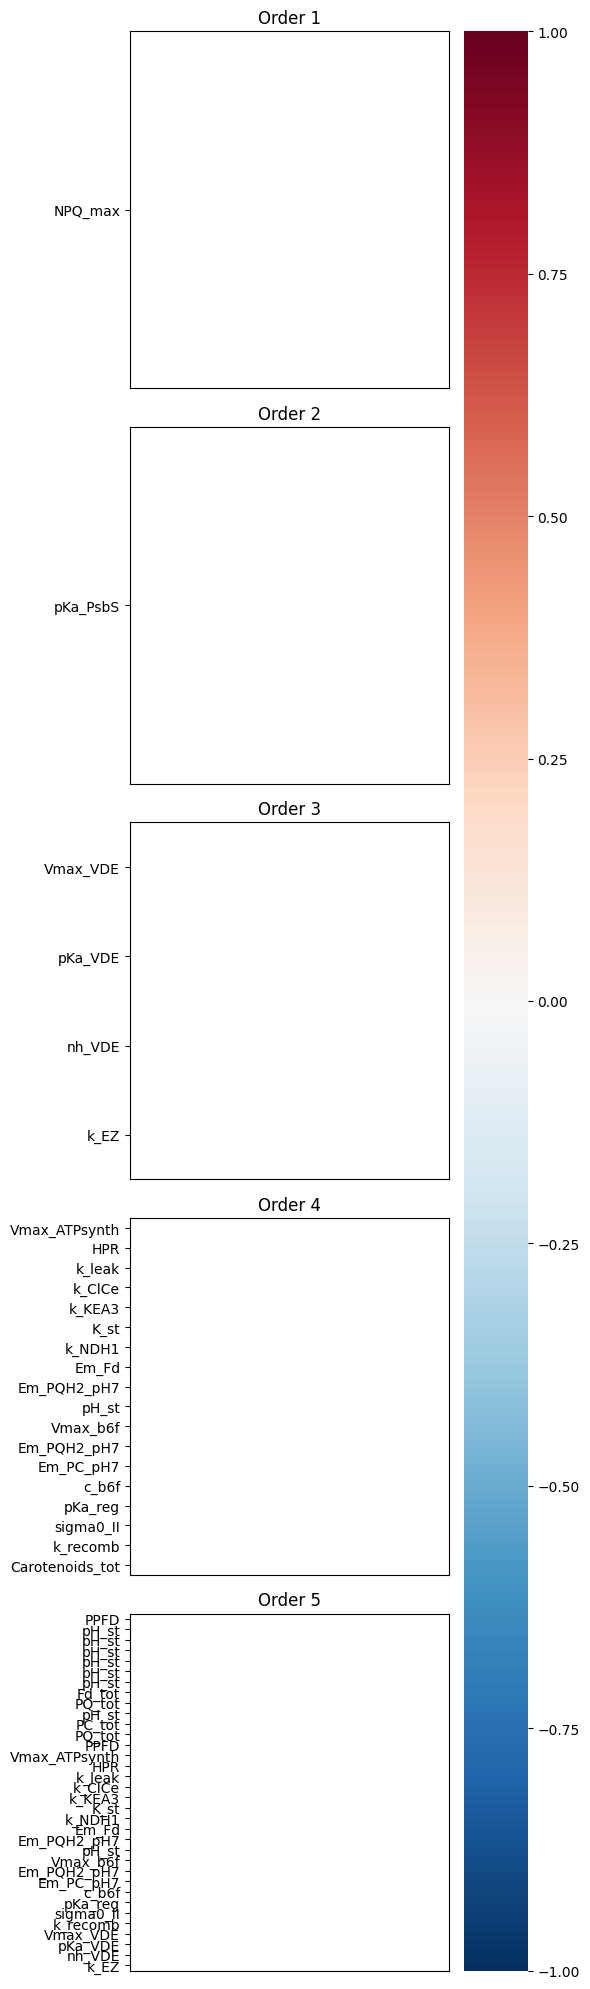

In [15]:
from GreenSlothUtils.demonstration.utils import find_params_to_fit_byorder

find_params_to_fit_byorder(
    to_fit_str=npq_str,
    model=Li2021(),
)

Trying pam-simulation with 100 time points per step.


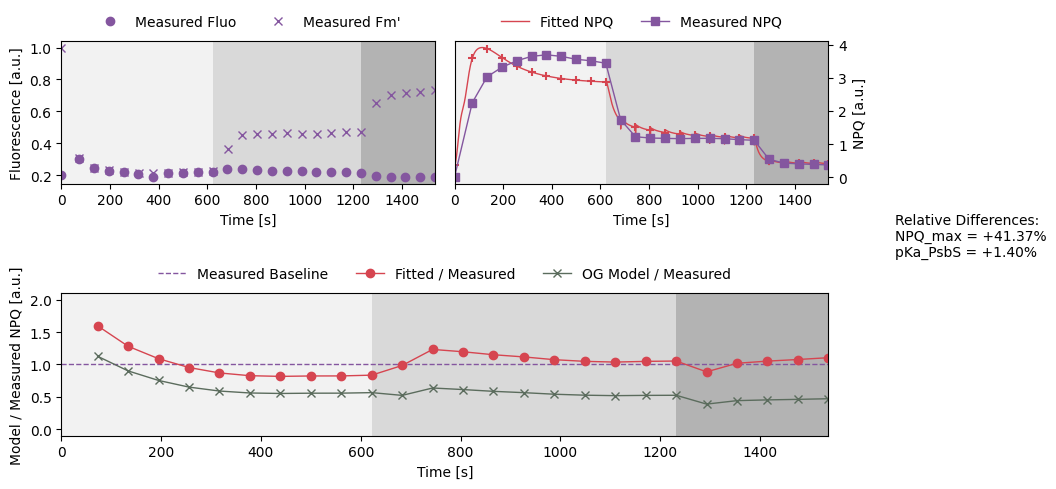

In [17]:
create_pamfit(
    model=Li2021(),
    pfd_str=pfd_str,
    fluorescence_str=fluorescence_str,
    npq_str=npq_str,
    pam_params_to_fit=["NPQ_max", "pKa_PsbS"]
)

save_fig("fitting")